# Finance Data Project 



In this data project we will focus on exploratory data analysis of stock prices.It is not meant to be a robust financial analysis or be taken as financial advice.


In [148]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [5]:
start = datetime.datetime(2006, 1, 1)    #data collection timeframe
end = datetime.datetime(2020,1 ,1 )

## DATA COLLECTION


In [6]:

# Bank Of Baroda
BARODA = data.DataReader("BANKBARODA.NS", 'yahoo', start, end)

# Punjab National Bank
PNB = data.DataReader("PNB.NS", 'yahoo', start, end)

# IndusInd Bank
INDUS = data.DataReader("INDUSINDBK.NS", 'yahoo', start, end)

# Kotak Mahindra Bank
KOTAK = data.DataReader("KOTAKBANK.NS", 'yahoo', start, end)

# AXIS Bank
AXIS = data.DataReader("AXISBANK.NS", 'yahoo', start, end)

# HDFC  Bank Limited 
HDFC = data.DataReader("HDFCBANK.NS", 'yahoo', start, end)

# ICICI BANK
ICICI = data.DataReader("ICICIBANK.NS", 'yahoo', start, end)

# STATE BANK OF INDIA
SBI= data.DataReader("SBIN.NS", 'yahoo', start, end)

In [10]:
df = data.DataReader(['SBI', 'ICICI', 'HDFC', 'AXIS', 'KOTAK', 'INDUS','PNB','BARODA'],'yahoo', start, end)

In [11]:
#creating ticker symbols
tickers = ['SBI', 'ICICI', 'HDFC', 'AXIS', 'KOTAK', 'INDUS','PNB','BARODA']


In [13]:
#Concatenating bank dataframes togther to a single data frame called bank_stocks
bank_stocks = pd.concat([SBI, ICICI, HDFC, AXIS, KOTAK, INDUS,PNB,BARODA],axis=1,keys=tickers) #arguments set to tickers


In [14]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']  #Setting the column name labels 


In [15]:
bank_stocks.head()

Bank Ticker        SBI                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-02   86.591599  85.119698  86.096298  85.379204  21240601.0   
2006-01-03   86.332199  85.483002  85.681099  86.053802  17462402.0   
2006-01-04   87.086998  86.398201  86.398201  86.605797  19420938.0   
2006-01-05   89.205200  86.728401  86.954903  88.813599  42574672.0   
2006-01-06   89.634499  87.855904  88.785301  88.705101  23846596.0   

Bank Ticker                  ICICI                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-02   18.207844  110.890999  106.855003  106.855003  108.544998  ...   
2006-01-03   18.351706  110.636002  104.473000  108.544998  110.273003  ...   
2006-01-04   18.469419  112.908997  110.544998  111.091003  111.582001  ...   
2006-01-05   18.940254  112.345001  108.091003  112.345001  109.917999  ...   
2006-01-06   18.917118  110.863998  108.117996  110.144997  109.117996  ...   

Bank Ticker        PNB                                      BARODA             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-02   93.400002  94.400002  4140820.0  26.171761  48.900002  48.020000   
2006-01-03   94.699997  94.680000  5132785.0  26.249395  49.700001  48.400002   
2006-01-04   95.760002  96.879997  6592535.0  26.859329  52.180000  50.000000   
2006-01-05   96.000000  98.849998  7397185.0  27.405495  52.759998  51.480000   
2006-01-06   98.900002  97.849998  3952320.0  27.128254  52.900002  51.599998   

Bank Ticker                                              
Stock Info        Open      Close     Volume  Adj Close  
Date                                                     
2006-01-02   48.310001  48.380001  4271115.0  13.400538  
2006-01-03   48.599998  49.139999  1693140.0  13.611050  
2006-01-04   50.000000  51.470001  8254105.0  14.256422  
2006-01-05   51.759998  52.290001  6023200.0  14.483553  
2006-01-06   52.400002  51.990002  2609275.0  14.400455  

[5 rows x 48 columns]

In [17]:
bank_stocks.to_csv('ind_banks_nse',index=False) #saving current dataframe as csv 

# EDA


In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max() #Checking max closing stock values of all times

Bank Ticker
SBI        372.399994
ICICI      549.400024
HDFC      1302.400024
AXIS       822.799988
KOTAK     1729.500000
INDUS     2023.050049
PNB        277.079987
BARODA     225.580002
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

$p_{t}$= Price at given time

In [19]:
returns = pd.DataFrame()

In [20]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

SBI Return  ICICI Return  HDFC Return  AXIS Return  KOTAK Return  \
Date                                                                           
2006-01-02         NaN           NaN          NaN          NaN           NaN   
2006-01-03    0.007901      0.015920    -0.000210     0.004509      0.043092   
2006-01-04    0.006415      0.011871     0.026286     0.023826      0.016610   
2006-01-05    0.025493     -0.014913     0.010177     0.024283      0.026602   
2006-01-06   -0.001222     -0.007278     0.039824     0.033421     -0.021220   

            INDUS Return  PNB Return  BARODA Return  
Date                                                 
2006-01-02           NaN         NaN            NaN  
2006-01-03      0.026981    0.002966       0.015709  
2006-01-04     -0.034483    0.023236       0.047416  
2006-01-05      0.022109    0.020334       0.015932  
2006-01-06     -0.017471   -0.010116      -0.005737

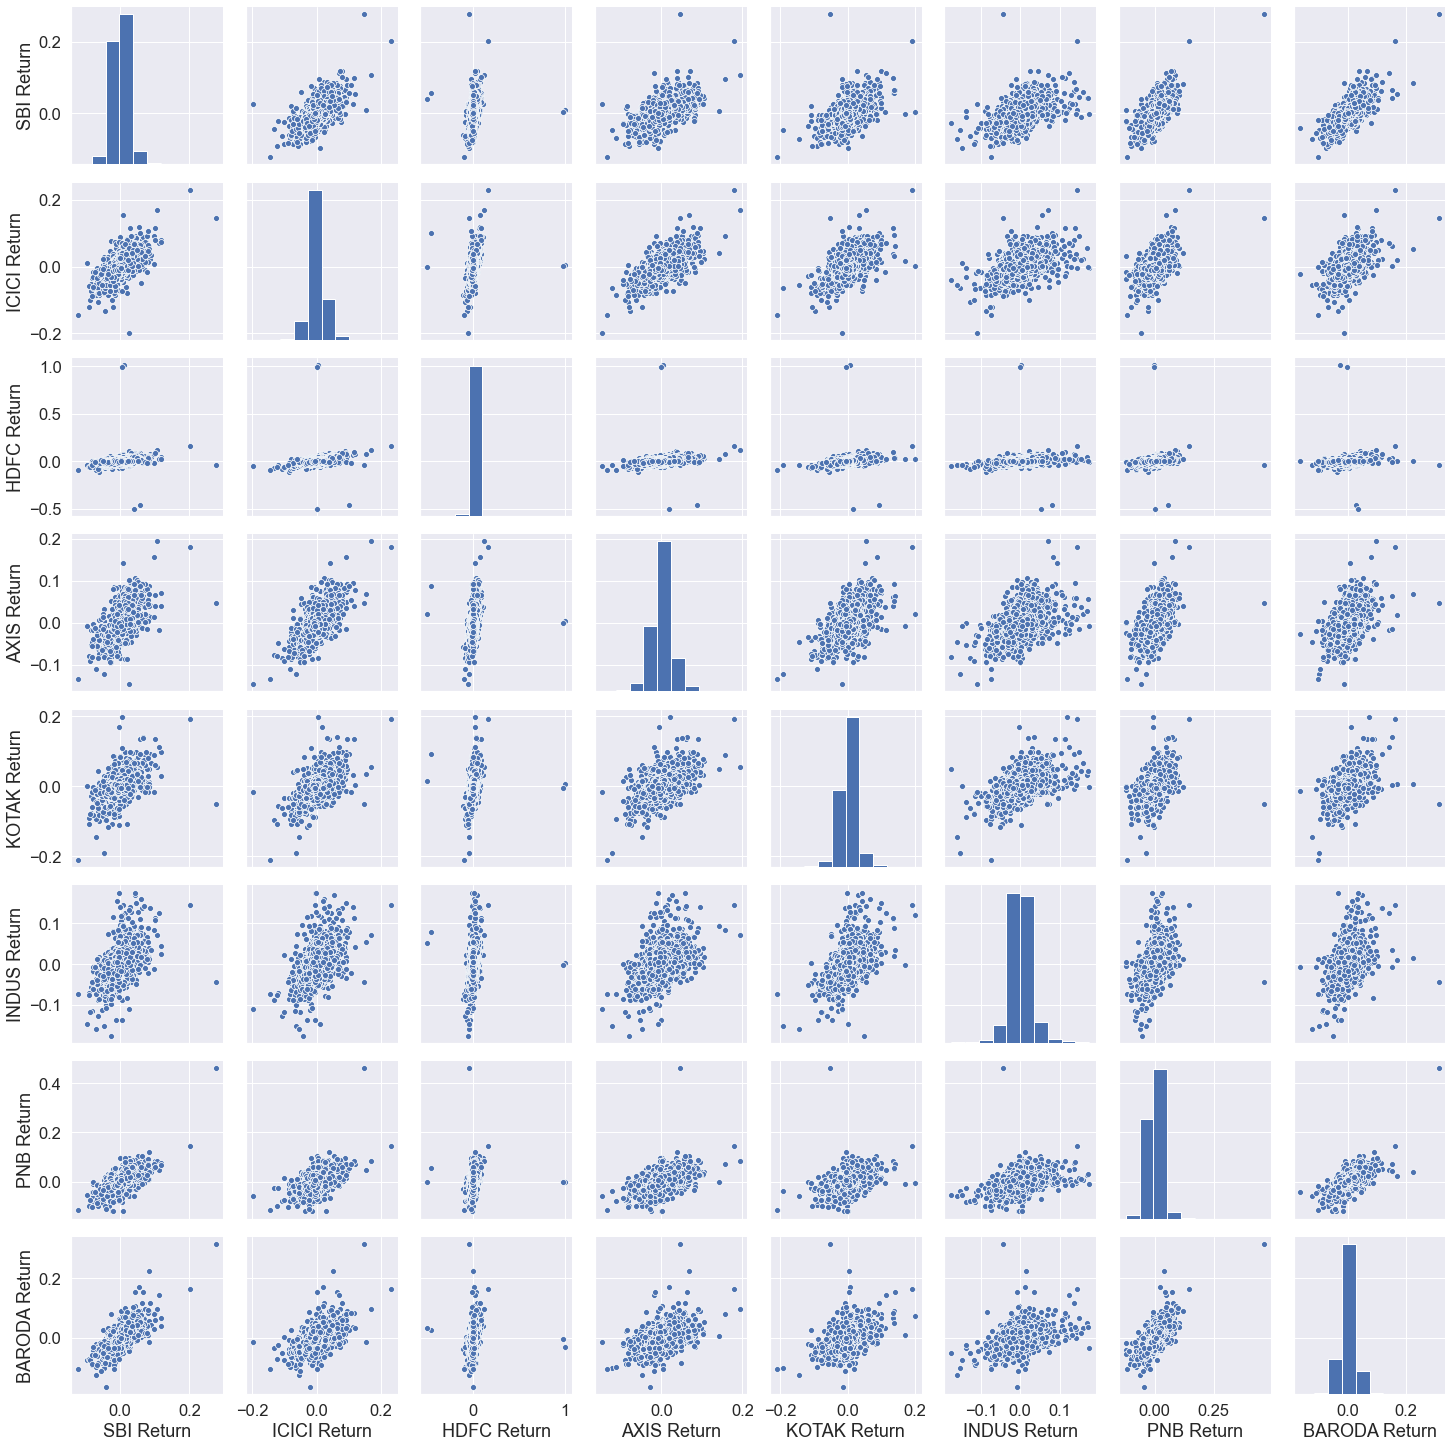

In [27]:
sns.set(font_scale=1.5)
import seaborn as sns
sns.pairplot(returns[1:])


In [41]:
# Checking for worst return prices from 2006 to 2020

returns.idxmin()

SBI Return      2008-10-24
ICICI Return    2008-10-10
HDFC Return     2009-10-14
AXIS Return     2008-10-10
KOTAK Return    2008-10-24
INDUS Return    2008-01-22
PNB Return      2018-02-27
BARODA Return   2018-09-18
dtype: datetime64[ns]

 - Multiple banks hit their lowest during OCT 2008 due to the global economic crisis
 - PNB lowest due to Nirav Modi Scam in 2018.[Source](https://en.wikipedia.org/wiki/Punjab_National_Bank_Scam)
 - Rekha Luthra vs Bank Of Baroda on 18 September, 2018.[Source](https://indiankanoon.org/doc/118237073/)

In [42]:
returns.idxmax()

SBI Return      2017-10-25
ICICI Return    2009-05-18
HDFC Return     2009-04-30
AXIS Return     2008-10-13
KOTAK Return    2006-06-09
INDUS Return    2006-08-18
PNB Return      2017-10-25
BARODA Return   2017-10-25
dtype: datetime64[ns]

 - SBI ,PNB,BARODA hits all time high due to infusion of capital by the govt . [Source](https://timesofindia.indiatimes.com/business/india-business/government-to-infuse-rs-2-11-lakh-crore-into-psu-banks/articleshow/61202181.cms)
 - ICICI,HDFC peak explaied [here](https://m.economictimes.com/tech/software/it-majors-trust-psu-banks-more-for-their-rs-20000-crore-cash/articleshow/4059929.cms?from=desktop&_ga=2.31975997.2061890127.1607324882-1767600827.1585151015)

In [48]:
# Riskiest Bank shares during said time

returns.std().sort_values(ascending=False)

HDFC Return      0.032341
INDUS Return     0.028462
BARODA Return    0.026870
PNB Return       0.026570
AXIS Return      0.025769
ICICI Return     0.025637
KOTAK Return     0.025196
SBI Return       0.023571
dtype: float64

HDFC Bank Returns highest risk!

In [49]:
# Riskiest Bank shares during said time

returns.loc['2015-01-01':'2015-12-31'].std().sort_values(ascending=False)

BARODA Return    0.027545
PNB Return       0.023300
AXIS Return      0.022537
ICICI Return     0.020133
SBI Return       0.019884
KOTAK Return     0.017174
INDUS Return     0.016938
HDFC Return      0.011722
dtype: float64

 - Bank of Baroda hit with Forex Scam 2015 explaining the high risk . [Source](https://www.financialexpress.com/industry/banking-finance/bank-of-baroda-forex-scam-all-you-need-to-know-in-10-points/152781/)

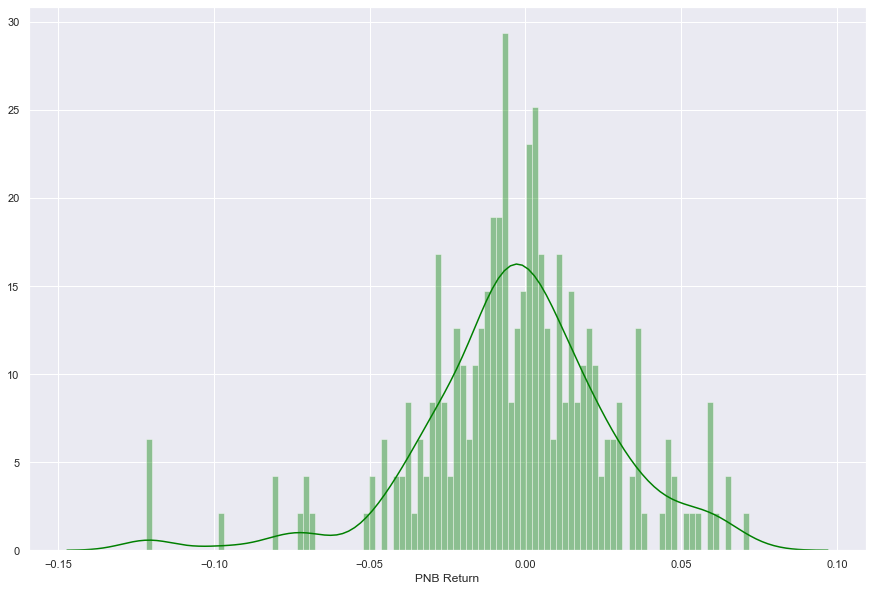

In [62]:
sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(returns.loc['2018-01-01':'2018-12-31']['PNB Return'],color='green',bins=100)


 - Graph shows huge deviations on the x axis in regard to the 2018 PNB Scam

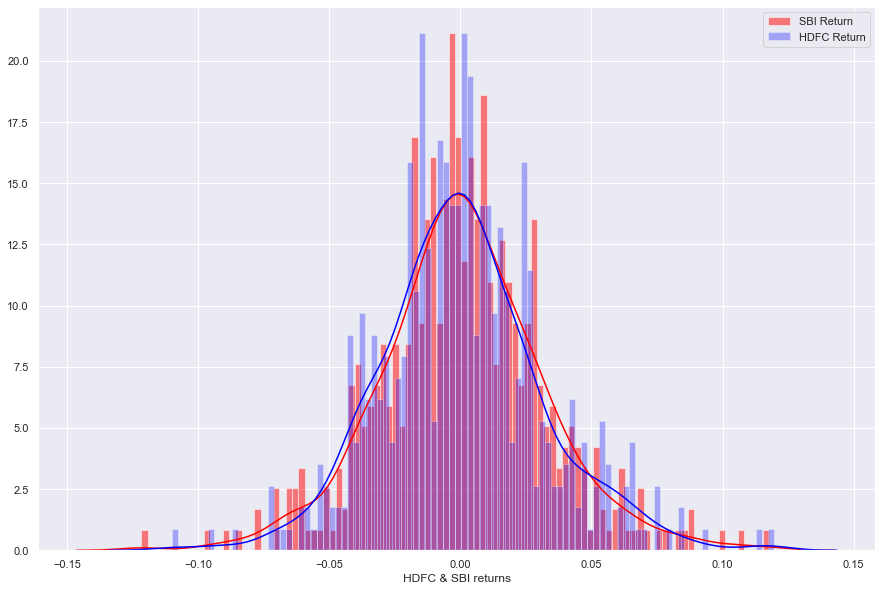

In [146]:

sns.set(rc={'figure.figsize':(15,10)})
sns.distplot(returns.loc['2007-01-01':'2008-12-31']['SBI Return'],color='red',bins=100, hist_kws=dict(alpha=0.5))
sns.distplot(returns.loc['2007-01-01':'2008-12-31']['HDFC Return'],color='blue',bins=100, hist_kws=dict(alpha=0.3))
plt.xlabel('HDFC & SBI returns')
plt.legend(["SBI Return", "HDFC Return"]) 



 - SBI & HDFC Shows stable retuns with only 0.1 deviations from the average.These banks are the top banks in INDIA

### Some More Vizualization

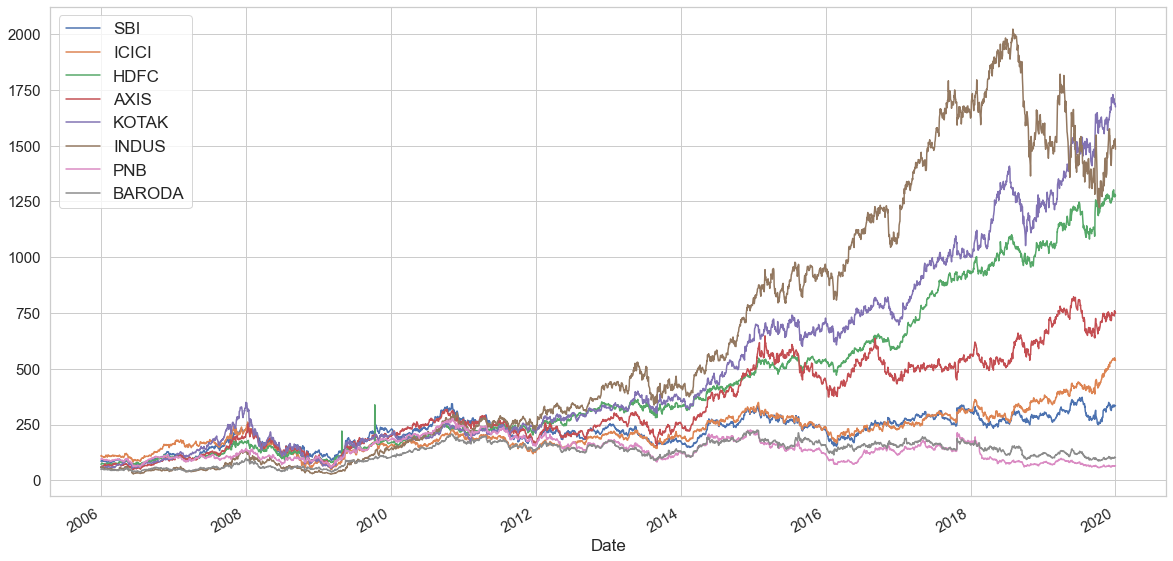

In [165]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(20,10),label=tick)
plt.legend()
plt.tick_params(labelsize=15)

 - Dip noted right after 2008 which was the global economiic crisis.
 - NOTE: The dip in stock close prices at 2019 which was th beginning of the COVID-19 Pandemic!

In [168]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()  #interactive plot!

Refer: Global Economic Crisis India [here](https://www.moneycontrol.com/news/opinion/opinion-2008-global-financial-crisis-had-a-part-to-play-in-indian-banks-npa-problems-2945481.html)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for State Bank of INDIA's stock for the year 2008**

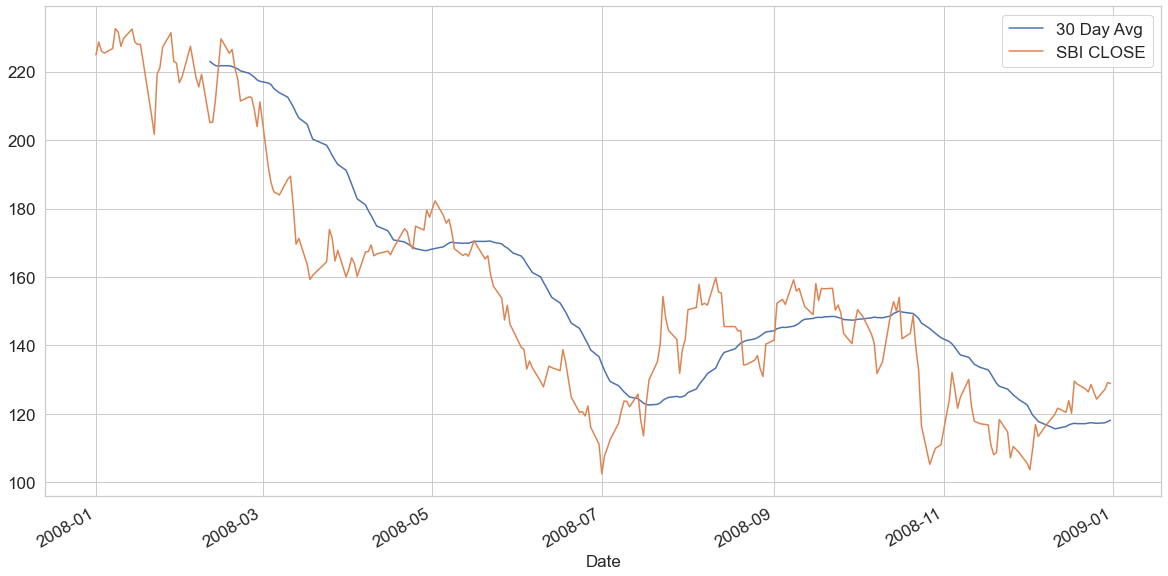

In [170]:
plt.figure(figsize=(20,10))
SBI['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg') #rolling method used for rolling average
SBI['Close'].loc['2008-01-01':'2009-01-01'].plot(label='SBI CLOSE')
plt.legend()

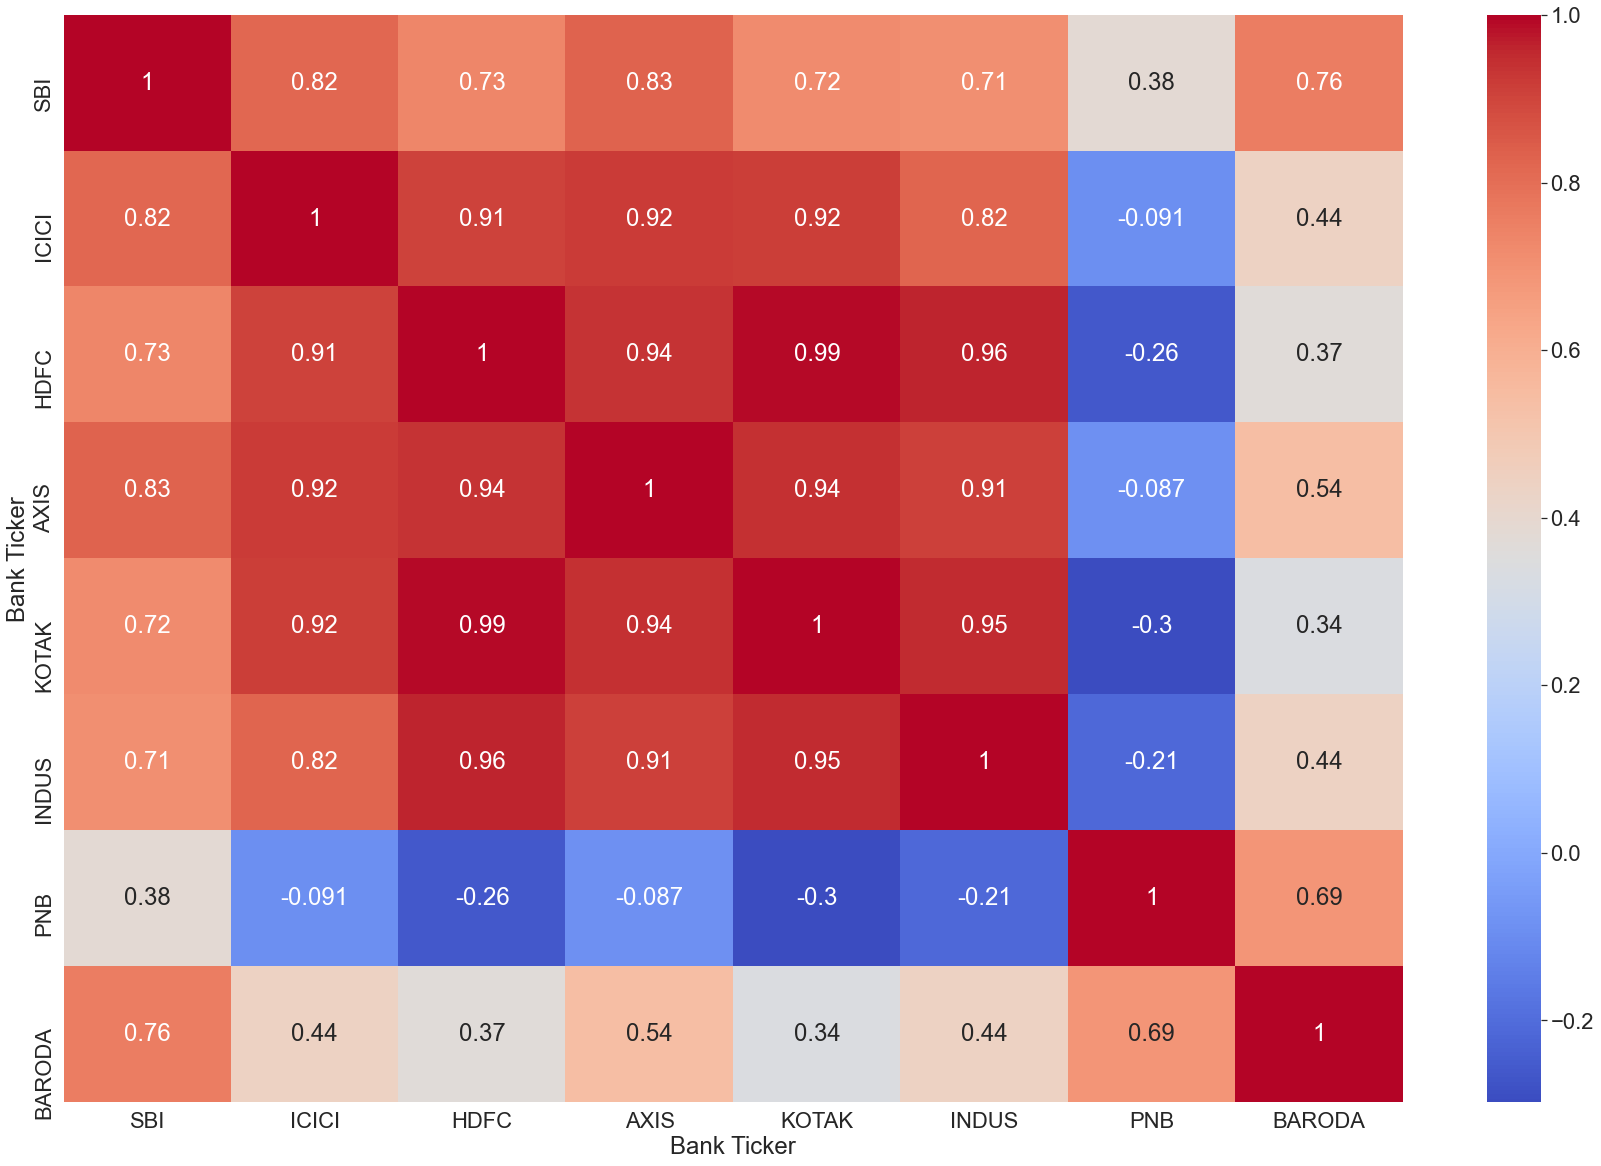

In [173]:
sns.set(font_scale=2)
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap="coolwarm") #corr matrix to a heatmap
sns.set(rc={'figure.figsize':(30,20)})

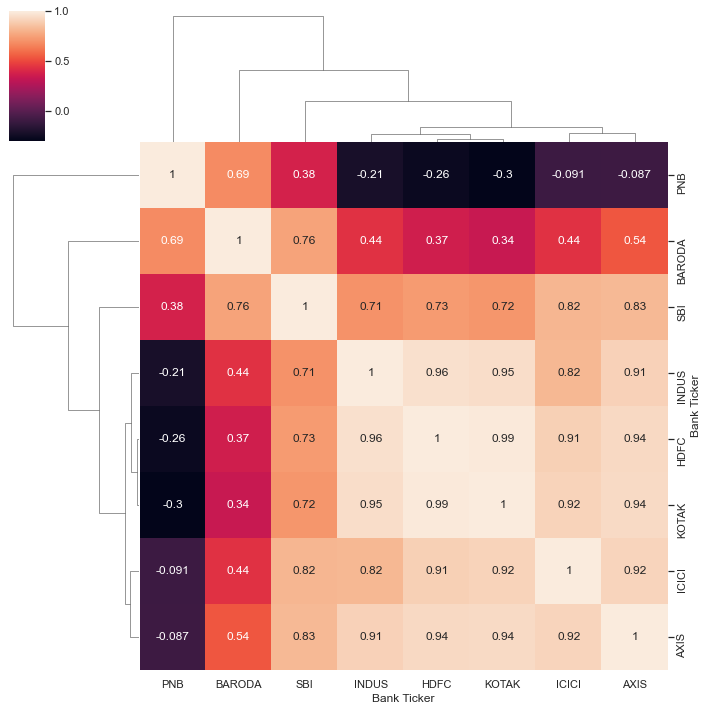

In [185]:

sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [187]:
#same heatmap but made interactive with plot.ly
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [188]:
SBI[['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2020-01-01'].iplot(kind='candle')

 - Notice November drop due to "Rumored" viral outbreak

In [189]:
PNB['Close'].loc['2017-01-01':'2019-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Once again we see the PNB 2018 Scam causing huge dip is PNB Stocks!

In [191]:
# bollinger band plot for ICICI bank
ICICI['Close'].loc['2015-01-01':'2019-01-01'].ta_plot(study='boll')

 - [ICICI Bank shares plunge over 7% on disappointing Q3 results ](https://www.thehindubusinessline.com/markets/stock-markets/icici-bank-shares-plunge-over-7-on-disappointing-q3-results/article8167176.ece)
 - [ICICI Bank Chanda Kochhar fraud case](https://en.wikipedia.org/wiki/Chanda_Kochhar)

# CONCLUSION

 -  SBI & HDFC banks have stayed the most reliable banks of the said time period
 -  PNB,Baroda hit with major setbacks which has left them lagging behind all other banks.
 -  INDUS bank made the fastest recovery form the 2007-08 Global Economic Crisis
 -  KOTAK & AXIS have been making slow and steady improvemts to their stocks prices.
 -  SBI is the best majority Govt. share bank & HDFC is the best private share bank 